##I. Perkenalan
Nama: Hafidz Muta'ali


This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

- ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total(Power): sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

#II. Import pustaka yang dibutuhkan

In [ ]:
#Import Library
import pandas as pd
import numpy as np
%matplotlib inline

#III. Data Loading
Bagian ini merupakan proses untuk memuat dan melakukan analisis sederhana terhadap data yang akan digunakan 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hafidzali04/Hacktiv8-phase0/main/data/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df.info() #digunakan untuk melihat nomor index beserta tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.describe() #digunakan untuk menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#IV. Data Cleaning

Bagian ini berisi proses persiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [ ]:
#Melakukan Copy dataframe agar data asli tidak terpengaruh jika terjadi perubahan
pokemon = df.copy()
pokemon.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
759,689,Barbaracle,Rock,Water,500,72,105,115,54,86,68,6,False
341,312,Minun,Electric,NaN,405,60,40,50,75,85,95,3,False
180,166,Ledian,Bug,Flying,390,55,35,50,55,110,85,2,False
601,541,Swadloon,Bug,Grass,380,55,63,90,50,80,42,5,False
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False


In [ ]:
#Rename columns Total menjadi Stats
pokemon.rename(columns = {'Total':'Power'}, inplace = True)
#Rename columns Name menjadi Pokemon
pokemon.rename(columns = {'Name':'Pokemon'}, inplace = True)
pokemon.head()

,#,Pokemon,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#Menghapus Kolom yang tidak dipakai
pokemon.drop(['#'],axis=1,inplace = True)

In [ ]:
#pengecekan terhadap missing values
pokemon.isnull().sum()

Pokemon         0
Type 1          0
Type 2        386
Power           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#mengisi missing values dengan type yang sama
pokemon["Type 2"].fillna(pokemon["Type 1"],inplace=True)
pokemon.sample(10)

,Pokemon,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
151,Kabuto,Rock,Water,355,30,80,90,55,45,55,1,False
554,Snivy,Grass,Grass,308,45,45,55,45,55,63,5,False
501,Skorupi,Poison,Bug,330,40,50,90,30,55,65,4,False
255,Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,False
127,Goldeen,Water,Water,320,45,67,60,35,50,63,1,False
612,Krokorok,Ground,Dark,351,60,82,45,45,45,74,5,False
180,Ledian,Bug,Flying,390,55,35,50,55,110,85,2,False
433,Grotle,Grass,Grass,405,75,89,85,55,65,36,4,False
402,Huntail,Water,Water,485,55,104,105,94,75,52,3,False
249,Kingdra,Water,Dragon,540,75,95,95,95,95,85,2,False


#V. Explorasi Data (EDA)
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [ ]:
pokemon["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [ ]:
pokemon["Type 2"].value_counts()

Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64

In [ ]:
#Menampilkan Pokemon Legendary dengan urutan Power tertinggi sampai terendah
pokemon.query("Power > 100 & \
          Legendary == True").sort_values(by='Power',ascending=False)

,Pokemon,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
701,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
705,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
704,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True


In [ ]:
#Menampilkan Pokemon bukan Legendary dengan urutan Power tertinggi sampai terendah
pokemon.query("Power > 100 & \
          Legendary == False").sort_values(by='Power',ascending=False)

,Pokemon,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,Slaking,Normal,Normal,670,150,160,100,95,65,100,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Caterpie,Bug,Bug,195,45,30,35,20,20,45,1,False
288,Wurmple,Bug,Bug,195,45,45,35,20,30,20,3,False
446,Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


In [ ]:
#Menampilkan Pokemon dengan Defense diatas 150, HP diatas 50, dan Speed diatas 25
pokemon.query("Defense > 150 & \
              HP>50 &\
              Speed>25").sort_values(by='Defense',ascending=False)

,Pokemon,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,AggronMega Aggron,Steel,Steel,630,70,140,230,60,80,50,3,False
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,Regirock,Rock,Rock,580,80,100,200,50,100,50,3,True
789,Avalugg,Ice,Ice,514,95,117,184,44,46,28,6,False
87,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
332,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
456,Bastiodon,Rock,Steel,495,60,52,168,47,138,30,4,False
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [ ]:
#Menampilkan Pokemon dengan awalan Mew dan Legendary
pokemon[(pokemon["Pokemon"].str.startswith("Mew")) & 
        (pokemon["Legendary"] == True)]

,Pokemon,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,Mewtwo,Psychic,Psychic,680,106,110,90,154,90,130,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True


In [ ]:
pokemon[(pokemon["Type 1"] == "Psychic")&
    (pokemon["Legendary"] == False )
   ].groupby(["Pokemon", "Type 1", "Type 2", "Generation"]).agg({"Sp. Atk": "sum", "Sp. Def" :"sum"})

,,,,Sp. Atk,Sp. Def
Pokemon,Type 1,Type 2,Generation,,
Abra,Psychic,Psychic,1,105,55
Alakazam,Psychic,Psychic,1,135,95
AlakazamMega Alakazam,Psychic,Psychic,1,175,95
Beheeyem,Psychic,Psychic,5,125,95
Celebi,Psychic,Grass,2,100,100
Chimecho,Psychic,Psychic,3,95,80
Chingling,Psychic,Psychic,4,65,50
Cresselia,Psychic,Psychic,4,75,130
Drowzee,Psychic,Psychic,1,43,90


In [ ]:
pokemon.groupby(["Type 1", "Type 2"]).agg({"Attack": "max", "Defense":"max", "HP":"max"}).reset_index()

,Type 1,Type 2,Attack,Defense,HP
0,Bug,Bug,125,100,80
1,Bug,Electric,77,60,70
2,Bug,Fighting,185,115,80
3,Bug,Fire,85,65,85
4,Bug,Flying,155,120,86
...,...,...,...,...,...
149,Water,Poison,95,75,80
150,Water,Psychic,75,180,95
151,Water,Rock,108,133,100
152,Water,Steel,86,88,84


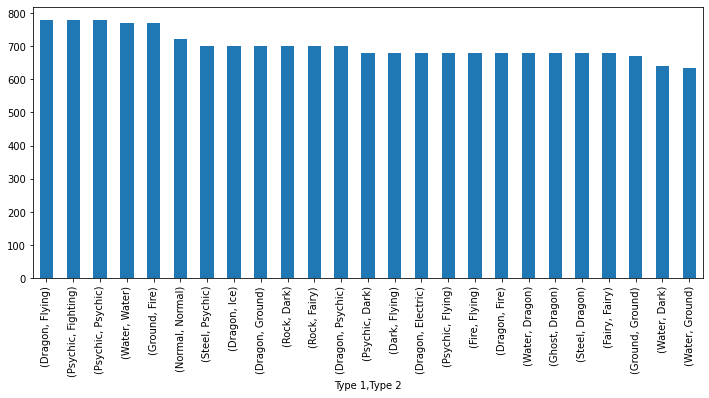

In [ ]:
#Menampilkan Power Tertinggi pokemon dengan Combinasi Type
pokemon.groupby(['Type 1','Type 2'])['Power'].max().sort_values(ascending = False).head(25).plot(kind = 'bar', figsize = (12, 5))

136


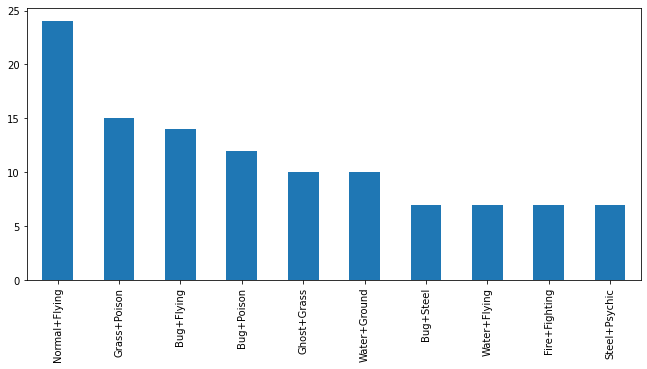

In [ ]:
#Menampilkan kombinasi type pokemon
visual=df.copy()
visual['Combination'] = (visual['Type 1'] + "+" + visual['Type 2'])
print(visual['Combination'].nunique())
visual["Combination"].value_counts().head(10).plot(kind="bar", figsize = (11, 5))

#VI. Pengambilan Kesimpulan
Dari analisis dan eksplorasi data yang dilakukan, akan didapatkan hasil sebagai berikut:

- Jenis pokemon terbanyak dari tipe 1 adalah Tipe Water sedangkan yang paling sedikit adalah Tipe Flying
- Jenis pokemon terbanyak dari tipe 2 adalah Tipe Flying sedangkan yang paling sedikit adalah Tipe Bug
- Power tertinggi pokemon legendary sebesar 780 dengan type Psychic	Fighting
- Power terendah pokemon legendary sebesar 580
- Power tertinggi pokemon non legendary sebesar 700 
- Power terendah pokemon non legendary sebesar 180
- Pokemon yang memiliki power terlemah bertipe Bug + Ghost
- Pokemon yang memiliki power terkuat bertipe Psychic +	Fighting, Psychic	+ Psychic,	Dragon +	Flyin
- Kombinasi tipe pokemon terbanyak adalah tipe Normal + Flying